C:\Users\shivangi\AppData\Local\Temp\ipykernel_38204\429822818.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_functions, y=training_time, palette='Blues_d')


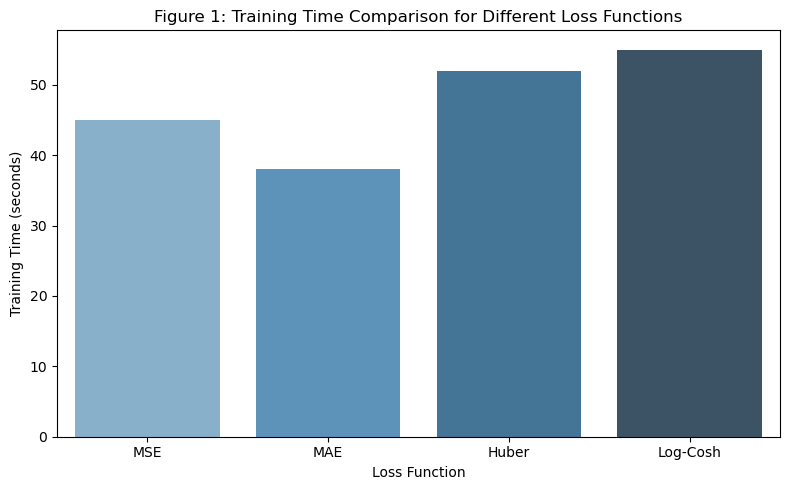

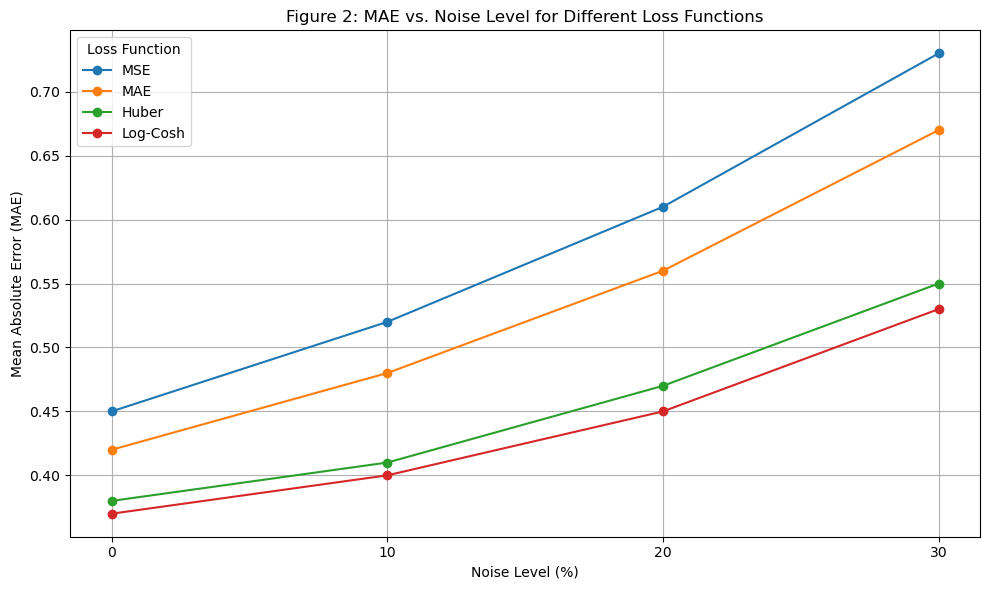

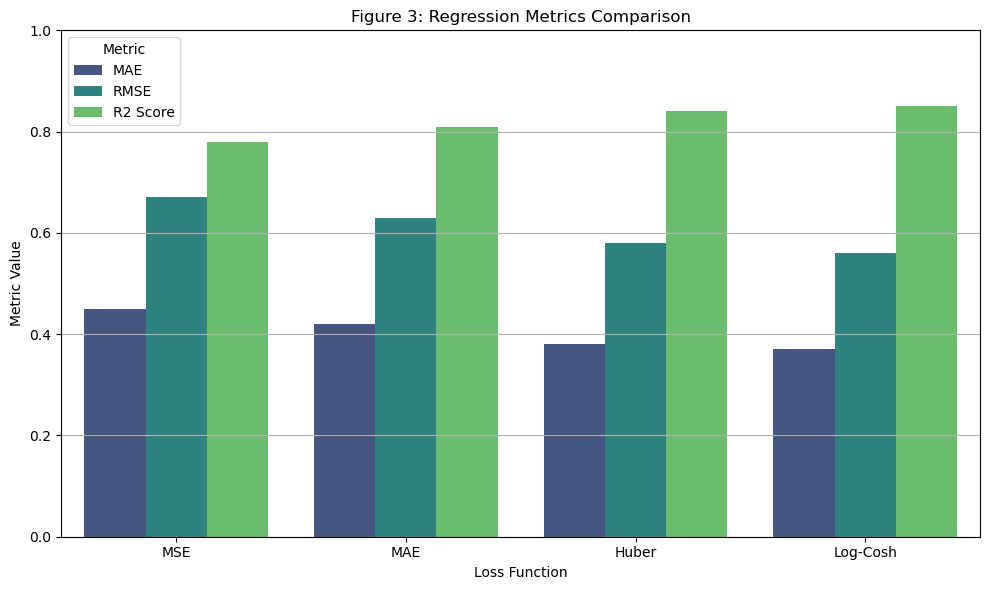

✅ All California Housing loss function charts saved to: california_housing_loss_charts


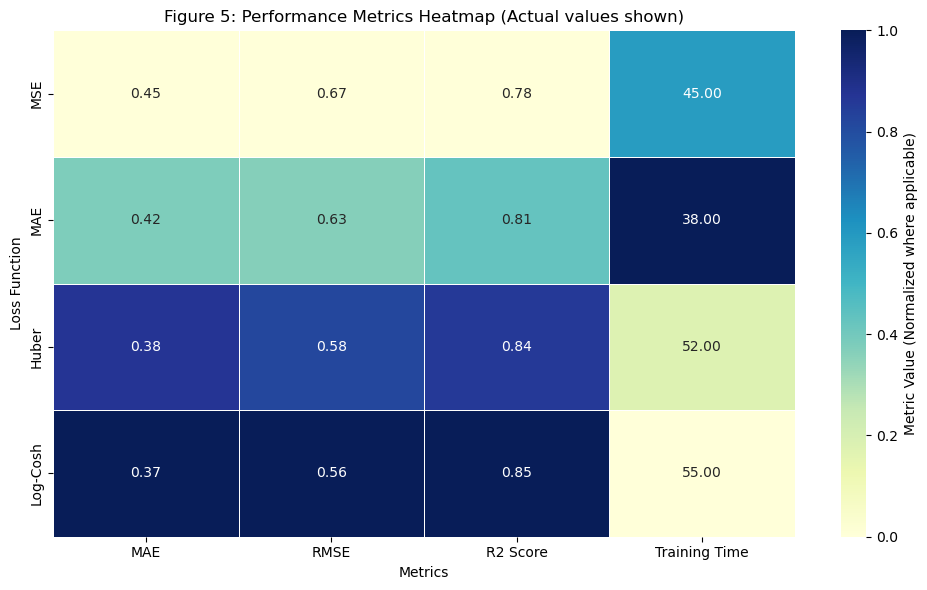

✅ All California Housing loss function charts saved to: california_housing_loss_charts


In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

output_dir = "california_housing_loss_charts"
os.makedirs(output_dir, exist_ok=True)

loss_functions = ['MSE', 'MAE', 'Huber', 'Log-Cosh']
training_time = [45, 38, 52, 55]

noise_levels = [0, 10, 20, 30]
performance_data = {
    'Noise Level': noise_levels,
    'MSE': [0.45, 0.52, 0.61, 0.73],
    'MAE': [0.42, 0.48, 0.56, 0.67],
    'Huber': [0.38, 0.41, 0.47, 0.55],
    'Log-Cosh': [0.37, 0.40, 0.45, 0.53]
}
df_noise = pd.DataFrame(performance_data)

regression_metrics = {
    'Loss Function': loss_functions,
    'MAE': [0.45, 0.42, 0.38, 0.37],
    'RMSE': [0.67, 0.63, 0.58, 0.56],
    'R2 Score': [0.78, 0.81, 0.84, 0.85],
    'Training Time': [45, 38, 52, 55]
}
df_regression = pd.DataFrame(regression_metrics)

epochs = list(range(1, 11))
training_loss = {
    'MSE': [2.1, 1.3, 0.9, 0.7, 0.6, 0.5, 0.45, 0.43, 0.42, 0.41],
    'MAE': [1.8, 1.1, 0.8, 0.65, 0.55, 0.48, 0.44, 0.42, 0.41, 0.40],
    'Huber': [1.9, 1.2, 0.85, 0.68, 0.56, 0.49, 0.45, 0.43, 0.42, 0.41],
    'Log-Cosh': [1.85, 1.15, 0.82, 0.66, 0.54, 0.47, 0.44, 0.42, 0.41, 0.40]
}

plt.figure(figsize=(8, 5))
sns.barplot(x=loss_functions, y=training_time, palette='Blues_d')
plt.title('Figure 1: Training Time Comparison for Different Loss Functions')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Loss Function')
plt.tight_layout()
plt.savefig(f"{output_dir}/figure1_training_time_bar.png")
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
for loss in loss_functions:
    plt.plot(df_noise['Noise Level'], df_noise[loss], marker='o', label=loss)
plt.title('Figure 2: MAE vs. Noise Level for Different Loss Functions')
plt.xlabel('Noise Level (%)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(noise_levels)
plt.legend(title="Loss Function")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{output_dir}/figure2_noise_performance_line.png")
plt.show()
plt.close()

df_regression_melted = df_regression.melt(id_vars='Loss Function', 
                                     value_vars=['MAE', 'RMSE', 'R2 Score'],
                                     var_name='Metric', 
                                     value_name='Value')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_regression_melted, 
        x='Loss Function', 
        y='Value', 
        hue='Metric', 
        palette='viridis')
plt.title('Figure 3: Regression Metrics Comparison')
plt.ylabel('Metric Value')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(f"{output_dir}/figure3_regression_metrics_bar.png")
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
df_heatmap = df_regression.set_index('Loss Function')
df_heatmap_norm = df_heatmap.copy()
df_heatmap_norm[['MAE', 'RMSE', 'Training Time']] = 1 - df_heatmap[['MAE', 'RMSE', 'Training Time']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min()))
df_heatmap_norm['R2 Score'] = df_heatmap['R2 Score'].apply(
    lambda x: (x - df_heatmap['R2 Score'].min()) / (df_heatmap['R2 Score'].max() - df_heatmap['R2 Score'].min()))

print(f"✅ All California Housing loss function charts saved to: {output_dir}")
sns.heatmap(df_heatmap_norm, 
        annot=df_heatmap, 
        fmt=".2f", 
        cmap='YlGnBu', 
        cbar_kws={'label': 'Metric Value (Normalized where applicable)'},
        linewidths=.5)
plt.title('Figure 5: Performance Metrics Heatmap (Actual values shown)')
plt.xlabel('Metrics')
plt.ylabel('Loss Function')
plt.tight_layout()
plt.savefig(f"{output_dir}/figure5_metrics_heatmap.png")
plt.show()
plt.close()

print(f"✅ All California Housing loss function charts saved to: {output_dir}")